# ENGR-E 221 Homework 4: Linear Regression Models

In [ ]:
import pandas as pd
df = pd.read_csv('Electricity_Consumption.csv')
print(df.shape)
df.head()

(52416, 7)


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620


# **Data Preprocessing (10 points)**

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Electricity_Consumption.csv')
print(df.shape)
df.head()

df.drop_duplicates()

columnNames = df.columns.to_list()

nanCount = 0
dateCount = 0
for name in columnNames:
    nanCount += (df[name]==0).sum()
print(nanCount)

#Do not need to handle missing values because there are no 0 values for any column

#changing DateTime to a numerical value
#going calculate it by time elapsed since the date and time

df["DateTime"] = pd.to_datetime(df["DateTime"], errors='coerce')

df["DateTime"] = (pd.Timestamp("today") - df["DateTime"]).dt.days

sc = StandardScaler()

x = df.drop(columns='Power Consumption')
y = df['Power Consumption']

x = sc.fit_transform(x)
df.head()



(52416, 7)
0


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Power Consumption
0,2830,6.559,73.8,0.083,0.051,0.119,34055.69620
1,2830,6.414,74.5,0.083,0.070,0.085,29814.68354
2,2830,6.313,74.5,0.080,0.062,0.100,29128.10127
3,2830,6.121,75.0,0.083,0.091,0.096,28228.86076
4,2830,5.921,75.7,0.081,0.048,0.085,27335.69620


# **Multicollinearity Analysis (8 points)**

In [25]:
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('Electricity_Consumption.csv')
print(df.shape)
df.head()

df.drop_duplicates(inplace=True)

columnNames = df.columns.to_list()

nanCount = 0
dateCount = 0

#Do not need to handle missing values because there are no 0 values for any column

#changing DateTime to a numerical value
#going calculate it by time elapsed since the date and time

df["DateTime"] = pd.to_datetime(df["DateTime"], errors='coerce')

df["DateTime"] = (pd.Timestamp("today") - df["DateTime"]).dt.days


sc = StandardScaler()

x = df.drop(columns='Power Consumption')
y = df['Power Consumption']

columnNames = x.columns.to_list()

for name in columnNames:
    nanCount += (x[name]==0).sum()
print(nanCount)

x_scaled = sc.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

#sb.pairplot(df)
#plt.show()

vif_df = pd.DataFrame()
vif_df['feature'] = x.columns

vif_df['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


print(vif_df)

#Since the VIF is so hight for Date Time, humidity and temperature we should drop those rows
#because it can cause problems when fitting the model to the data

correlation_matrix = df.corr()
print(correlation_matrix)

x= x_scaled_df.drop(columns=['DateTime', 'Humidity', 'Temperature'])



(52416, 7)
0
                 feature        VIF
0               DateTime  49.648975
1            Temperature  18.103297
2               Humidity  26.484402
3             Wind Speed   2.243111
4  general diffuse flows   2.884401
5          diffuse flows   2.037656
                       DateTime  Temperature  Humidity  Wind Speed  \
DateTime               1.000000    -0.282766  0.021436   -0.180308   
Temperature           -0.282766     1.000000 -0.460243    0.477109   
Humidity               0.021436    -0.460243  1.000000   -0.135853   
Wind Speed            -0.180308     0.477109 -0.135853    1.000000   
general diffuse flows  0.020190     0.460294 -0.468138    0.133733   
diffuse flows          0.132845     0.196522 -0.256886   -0.000972   
Power Consumption      0.001136     0.440221 -0.287421    0.167444   

                       general diffuse flows  diffuse flows  Power Consumption  
DateTime                            0.020190       0.132845           0.001136  
Temperature 

# **Simple Linear Regression (8 points)**

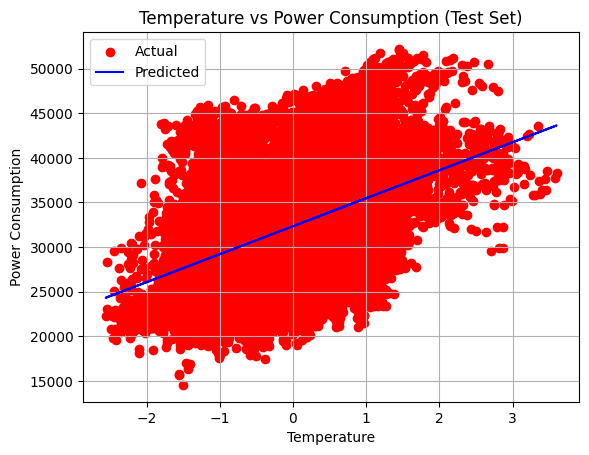

19.258405100749098 % accuracy


,Actual,Predicted
0,27782.78146,33232.408053
1,26386.34573,33302.515394
2,27506.54867,36764.739466
3,30388.30565,35680.772116
4,22517.46835,27510.570451
...,...,...
13099,38926.34850,37854.099688
13100,29888.97338,27834.142794
13101,43291.13924,30363.399943
13102,45137.56728,31911.154318


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics


x_temp=pd.DataFrame(x_scaled_df['Temperature'])

#Based off the correlation matrix temperature has the best correlation so we will use that
x_train, x_test, y_train, y_test = train_test_split(x_temp, y, test_size=.25, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)


# Plotting Test Results
plt.scatter(x_test, y_test, color='red', label='Actual')
plt.plot(x_test, y_pred, color='blue', label='Predicted')
plt.title('Temperature vs Power Consumption (Test Set)')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption')
plt.legend()
plt.grid(True)
plt.show()

r2_score = regressor.score(x_test,y_test)
print(r2_score*100,'% accuracy')

testdf = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
testdf

# **Polynomial Regression (8 points)**

Score 1: 0.05314785830648694
Score 2: 0.08323897058714513


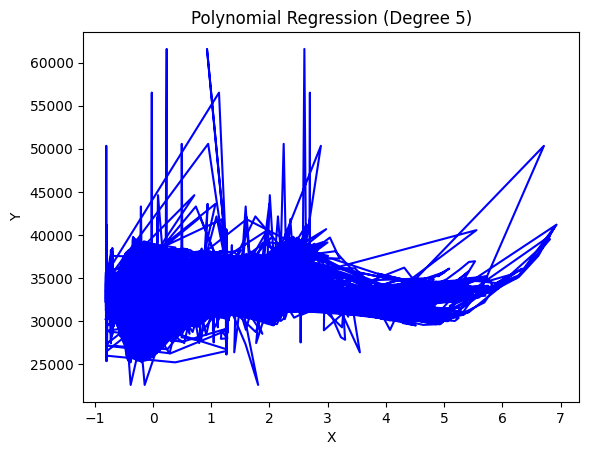

,Actual,Predicted
0,27782.78146,32825.024158
1,26386.34573,32826.911801
2,27506.54867,36638.536036
3,30388.30565,35667.344774
4,22517.46835,30717.034306
...,...,...
13099,38926.34850,36739.970274
13100,29888.97338,30716.563343
13101,43291.13924,32869.486056
13102,45137.56728,30768.771269


In [39]:
from sklearn.preprocessing import PolynomialFeatures

x = pd.DataFrame(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(f'Score 1: {lin_reg.score(x_test, y_test)}')

poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)
print(f'Score 2: {lin_reg_2.score(x_poly, y)}')



plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color='blue')
plt.title('Polynomial Regression (Degree 5)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



testdf = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
testdf

# **Multiple Linear Regression (8 points)**

[[32825.02 27782.78]
 [32826.91 26386.35]
 [36638.54 27506.55]
 ...
 [32869.49 43291.14]
 [30768.77 45137.57]
 [34866.22 38319.02]]
R² score: 0.053088042222528276


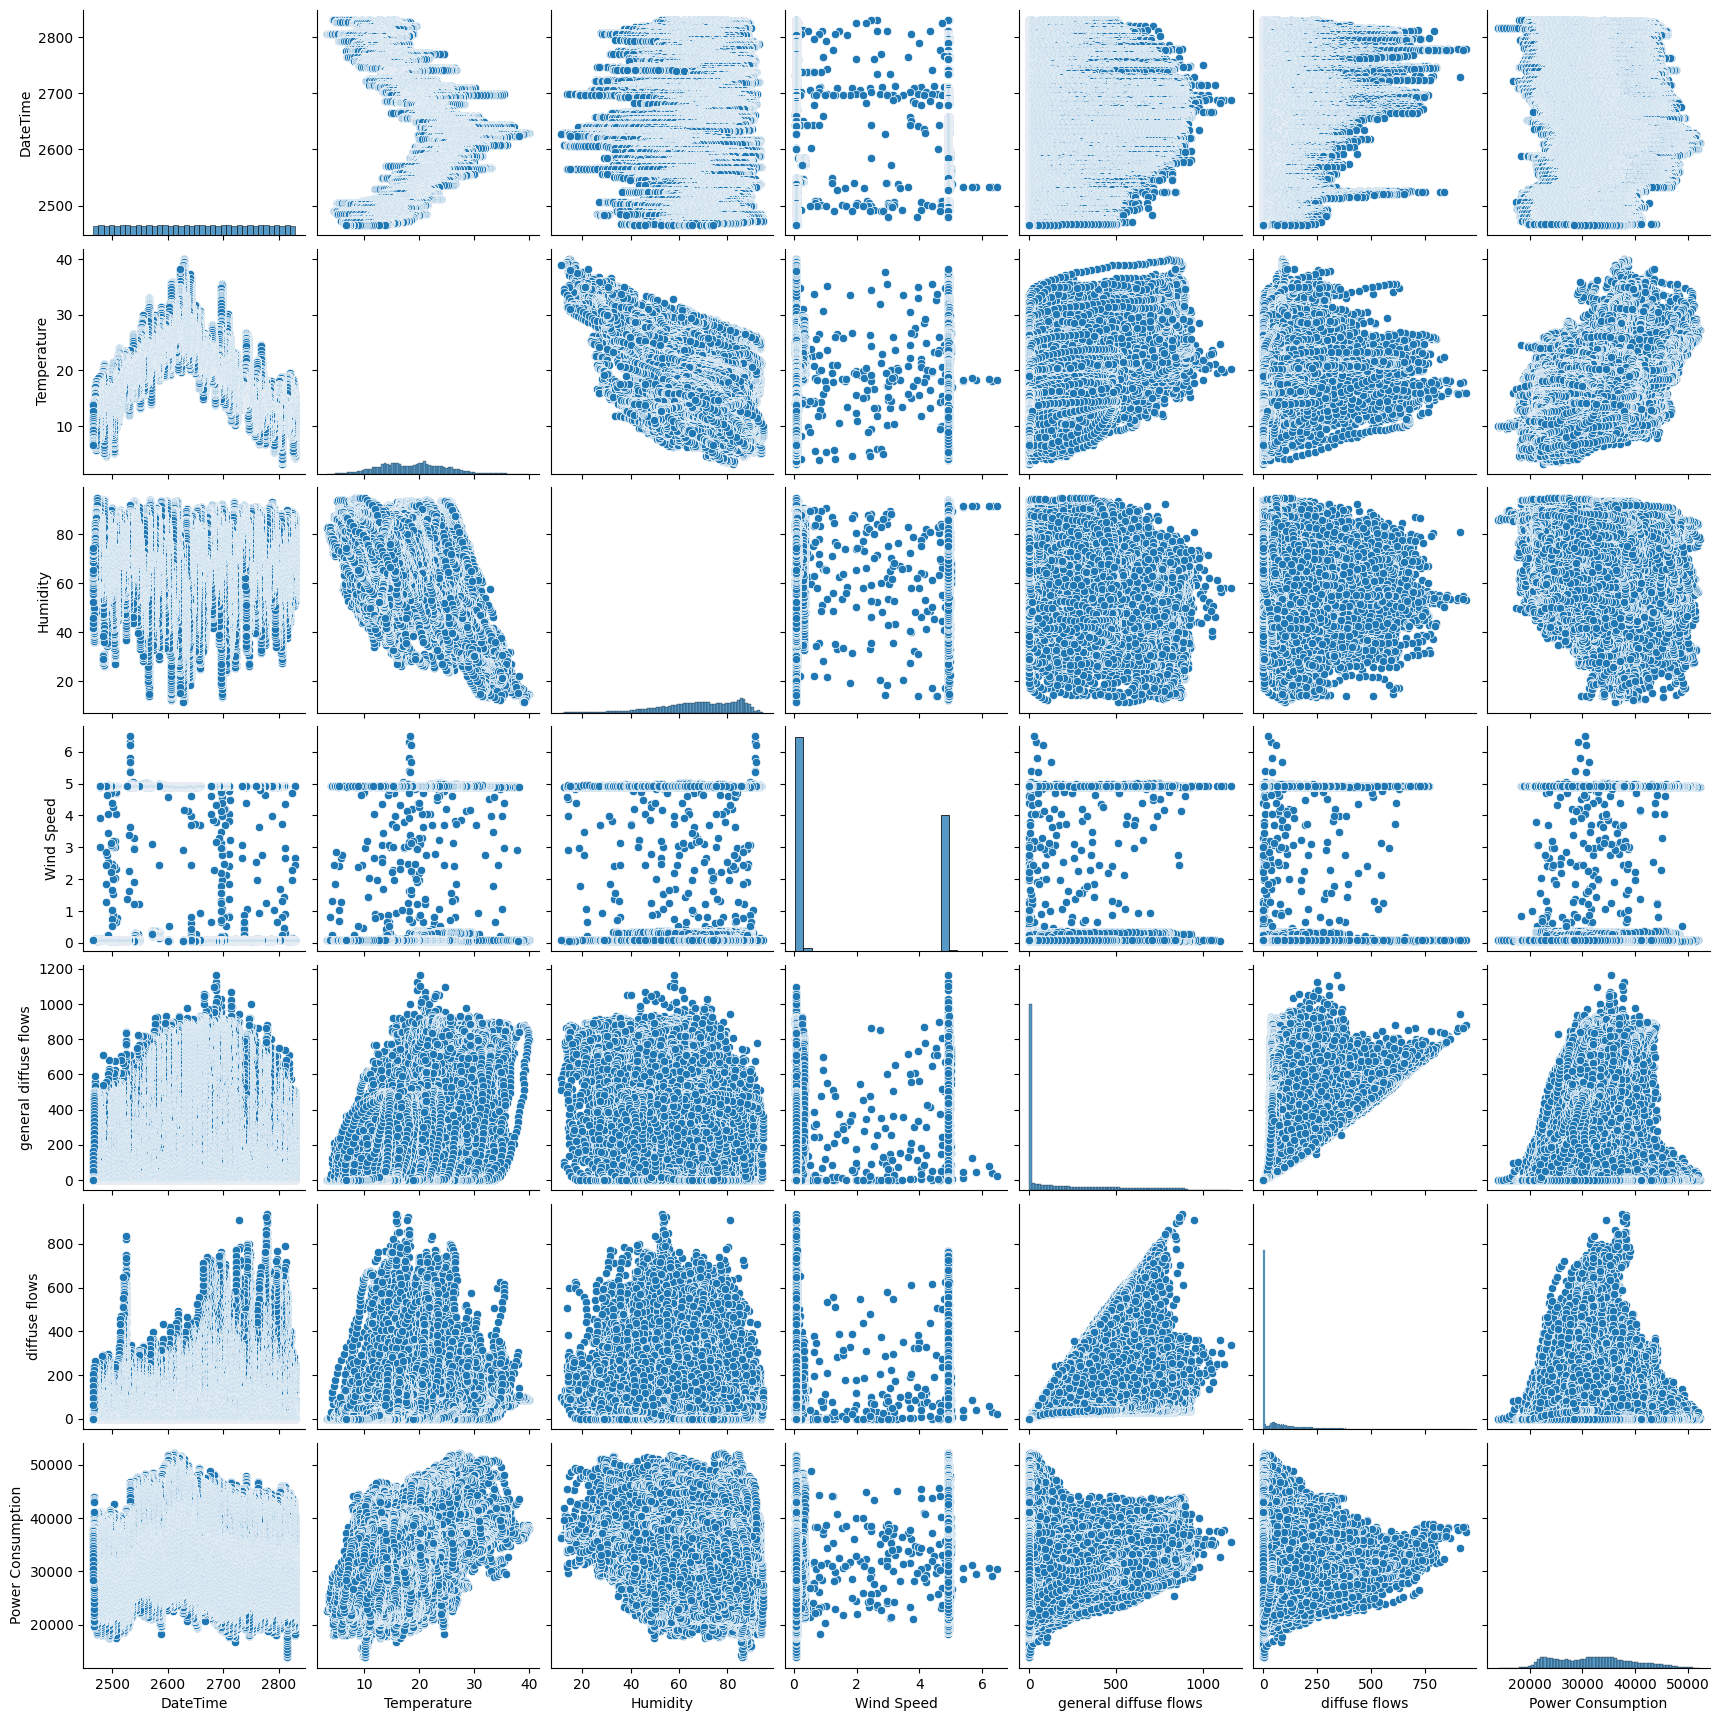

,Actual,Predicted
0,27782.78146,32825.024158
1,26386.34573,32826.911801
2,27506.54867,36638.536036
3,30388.30565,35667.344774
4,22517.46835,30717.034306
...,...,...
13099,38926.34850,36739.970274
13100,29888.97338,30716.563343
13101,43291.13924,32869.486056
13102,45137.56728,30768.771269


In [40]:
from sklearn.metrics import r2_score
import numpy as np
x= x_scaled_df.drop(columns=['DateTime', 'Humidity', 'Temperature'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

r2Score = r2_score(y_test, y_pred)
print(f"R² score: {r2Score}")

sb.pairplot(df)
plt.show()

testdf = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
testdf

# **Model Comparison in Your Own Words (8 points)**

The simple linear regression and the multiple linear regression both performed about the same and had similar R^2 scores. The polynomial regression had a very similar score for using one degree, but the more you up the degree the better the fit gets. You need to be careful when upping the degree because it can cause the model to overfit.